In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WTTP/Data_final.csv')

In [ ]:
# # Drop columns with NaN values
# df.dropna(axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             300 non-null    int64  
 1   CharacteristicsInstallations                   300 non-null    object 
 2   Periods                                        300 non-null    object 
 3   Biogas_Production_2                            246 non-null    float64
 4   External_delivery_biogas_3                     246 non-null    float64
 5   Total_Consumption_Biogas_6                     246 non-null    float64
 6   Electricity-GeneratedViaWindAndSolarEnergy_12  256 non-null    float64
 7   Electricity-GeneratedInCHPInstallations_13     256 non-null    float64
 8   External_delivery_electricity_14               256 non-null    float64
 9   Total_Consumption_Electricity_15               256 non

In [ ]:
df

,ID,CharacteristicsInstallations,Periods,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,0,T001188,2013JJ00,109866.0,11347.0,92560.0,1331.0,209401.0,41296.0,779037.0,1099.0,1114.0,22961.0
1,1,T001188,2014JJ00,108012.0,11672.0,89569.0,2417.0,210950.0,40124.0,762091.0,1002.0,1013.0,20568.0
2,2,T001188,2015JJ00,106897.0,10259.0,89150.0,2820.0,216906.0,42966.0,780718.0,733.0,746.0,20861.0
3,3,T001188,2016JJ00,115222.0,9989.0,94563.0,1651.0,221135.0,47713.0,788580.0,961.0,973.0,20704.0
4,4,T001188,2017JJ00,116835.0,8771.0,94669.0,1864.0,220753.0,51210.0,801490.0,1129.0,1141.0,20872.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,A049107,2018JJ00,51086.0,10428.0,34417.0,751.0,72448.0,3538.0,231913.0,138.0,138.0,348.0
296,296,A049107,2019JJ00,58152.0,13590.0,38574.0,4288.0,72874.0,4326.0,236883.0,1445.0,1445.0,619.0
297,297,A049107,2020JJ00,61325.0,16316.0,40230.0,5781.0,62002.0,5075.0,235650.0,4537.0,4537.0,1219.0
298,298,A049107,2021JJ00,60605.0,9247.0,46547.0,8494.0,55033.0,6033.0,235654.0,11728.0,11733.0,1775.0


In [ ]:
# Drop non-numerical and identifier columns
df_use = df.drop(columns=['CharacteristicsInstallations', 'Periods', 'ID'])

In [ ]:
# prompt: impute the missing values in each column of df_use using knn or random forest

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

# Choose imputation method (knn or rf)
method = 'knn'  # Change to 'rf' for Random Forest

# Create imputer
if method == 'knn':
  imputer = KNNImputer(n_neighbors=5)
elif method == 'rf':
  imputer = RandomForestRegressor(random_state=42)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_use), columns=df_use.columns)

# Display the imputed dataframe
df_imputed


,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,109866.0,11347.0,92560.0,1331.0,209401.0,41296.0,779037.0,1099.0,1114.0,22961.0
1,108012.0,11672.0,89569.0,2417.0,210950.0,40124.0,762091.0,1002.0,1013.0,20568.0
2,106897.0,10259.0,89150.0,2820.0,216906.0,42966.0,780718.0,733.0,746.0,20861.0
3,115222.0,9989.0,94563.0,1651.0,221135.0,47713.0,788580.0,961.0,973.0,20704.0
4,116835.0,8771.0,94669.0,1864.0,220753.0,51210.0,801490.0,1129.0,1141.0,20872.0
...,...,...,...,...,...,...,...,...,...,...
295,51086.0,10428.0,34417.0,751.0,72448.0,3538.0,231913.0,138.0,138.0,348.0
296,58152.0,13590.0,38574.0,4288.0,72874.0,4326.0,236883.0,1445.0,1445.0,619.0
297,61325.0,16316.0,40230.0,5781.0,62002.0,5075.0,235650.0,4537.0,4537.0,1219.0
298,60605.0,9247.0,46547.0,8494.0,55033.0,6033.0,235654.0,11728.0,11733.0,1775.0


In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Biogas_Production_2                            300 non-null    float64
 1   External_delivery_biogas_3                     300 non-null    float64
 2   Total_Consumption_Biogas_6                     300 non-null    float64
 3   Electricity-GeneratedViaWindAndSolarEnergy_12  300 non-null    float64
 4   Electricity-GeneratedInCHPInstallations_13     300 non-null    float64
 5   External_delivery_electricity_14               300 non-null    float64
 6   Total_Consumption_Electricity_15               300 non-null    float64
 7   Production_of_Natural_Gas_21                   300 non-null    float64
 8   External_Delivery_Natural_Gas_22               300 non-null    float64
 9   Total_Consumption_Natural_Gas_23               300 non

In [ ]:
# Standardize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [ ]:
# Create and fit the GMM with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df_scaled)

GaussianMixture(n_components=2, random_state=42)

In [ ]:
def generate_nonnegative_data(gmm, n_samples, n_features):
    generated_data = []
    while len(generated_data) < n_samples:
        new_data = gmm.sample(n_samples)[0]
        # Use absolute value to ensure non-negativity
        nonnegative_data = np.abs(new_data)
        generated_data.extend(nonnegative_data)
    return np.array(generated_data[:n_samples])

In [ ]:
# Generate new data
n_samples = 500
n_features = df_use.shape[1]
new_data = generate_nonnegative_data(gmm, n_samples, n_features)

In [ ]:
# Inverse transform the generated data to match the original scale
new_data_original_scale = scaler.inverse_transform(new_data)


In [ ]:
# Create a DataFrame for the new data
new_df_df = pd.DataFrame(new_data_original_scale, columns=df_use.columns)

In [ ]:
df_use

,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,109866.0,11347.0,92560.0,1331.0,209401.0,41296.0,779037.0,1099.0,1114.0,22961.0
1,108012.0,11672.0,89569.0,2417.0,210950.0,40124.0,762091.0,1002.0,1013.0,20568.0
2,106897.0,10259.0,89150.0,2820.0,216906.0,42966.0,780718.0,733.0,746.0,20861.0
3,115222.0,9989.0,94563.0,1651.0,221135.0,47713.0,788580.0,961.0,973.0,20704.0
4,116835.0,8771.0,94669.0,1864.0,220753.0,51210.0,801490.0,1129.0,1141.0,20872.0
...,...,...,...,...,...,...,...,...,...,...
295,51086.0,10428.0,34417.0,751.0,72448.0,3538.0,231913.0,138.0,138.0,348.0
296,58152.0,13590.0,38574.0,4288.0,72874.0,4326.0,236883.0,1445.0,1445.0,619.0
297,61325.0,16316.0,40230.0,5781.0,62002.0,5075.0,235650.0,4537.0,4537.0,1219.0
298,60605.0,9247.0,46547.0,8494.0,55033.0,6033.0,235654.0,11728.0,11733.0,1775.0


In [ ]:
new_df_df

,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,4220.933208,1030.847786,2825.132805,967.237038,989.050094,-1125.837589,46787.554144,380.725380,388.241438,201.154695
1,26685.613564,2351.352861,22631.302575,1983.921722,41594.584214,3258.064016,132527.905862,920.561421,902.345371,748.999648
2,18886.966429,1708.229790,15555.736715,3240.865525,33090.204536,6188.408444,152253.498108,691.608560,737.982581,2167.232345
3,15883.680155,928.947747,13930.246303,12806.239184,16318.286238,10481.997280,136712.305686,392.859495,388.927062,2863.462008
4,13888.279007,1295.565806,11627.314832,914.602155,32553.849474,7887.513932,30128.767132,426.149928,414.190490,3491.848283
...,...,...,...,...,...,...,...,...,...,...
495,21326.551025,4013.267284,14560.755557,12377.361512,13982.684026,12114.764733,94587.731557,5430.852788,5260.466332,1941.176740
496,70192.515191,9739.743854,53417.879534,1204.774786,91357.898428,13396.303915,288767.442313,5434.256674,4841.473740,3787.146814
497,99793.710232,19060.059323,74235.107723,2971.458827,182721.111431,24096.060433,553855.516397,4218.342285,3609.547099,10418.351569
498,63608.588107,1404.316579,55814.894386,4080.281281,92919.535831,10689.898604,278039.041716,1932.531946,1949.636192,1387.623409


In [ ]:
# Compare descriptive statistics
df_stats = df_use.describe()
new_df_stats = new_df_df.describe()

In [ ]:
print("Means (Original Data):")
print(df_stats.loc['mean'])
print("\nMeans (Generated Data):")
print(new_df_stats.loc['mean'])

print("\nStandard deviations (Original Data):")
print(df_stats.loc['std'])
print("\nStandard deviations (Generated Data):")
print(new_df_stats.loc['std'])

Means (Original Data):
Biogas_Production_2                               19463.662602
External_delivery_biogas_3                         1883.760163
Total_Consumption_Biogas_6                        16028.764228
Electricity-GeneratedViaWindAndSolarEnergy_12      3840.683594
Electricity-GeneratedInCHPInstallations_13        33855.707031
External_delivery_electricity_14                   9520.585938
Total_Consumption_Electricity_15                 123569.921875
Production_of_Natural_Gas_21                        817.089844
External_Delivery_Natural_Gas_22                    806.734375
Total_Consumption_Natural_Gas_23                   3403.875000
Name: mean, dtype: float64

Means (Generated Data):
Biogas_Production_2                               20479.854054
External_delivery_biogas_3                         2131.878114
Total_Consumption_Biogas_6                        16881.078766
Electricity-GeneratedViaWindAndSolarEnergy_12      6809.553971
Electricity-GeneratedInCHPInstallations_13 

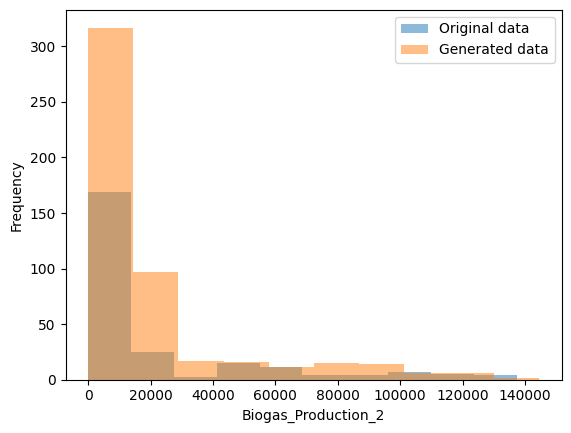

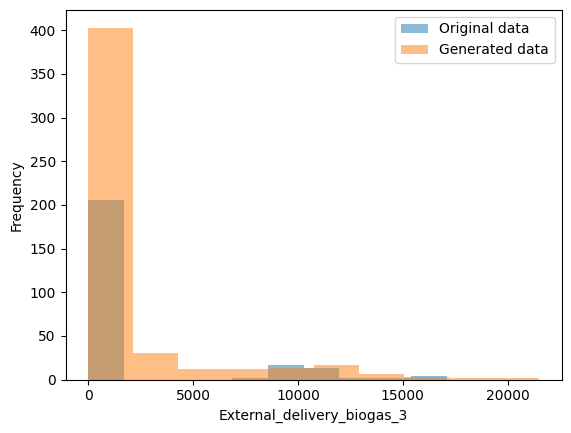

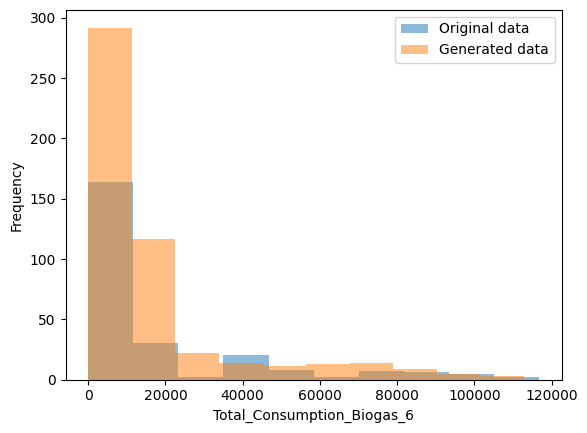

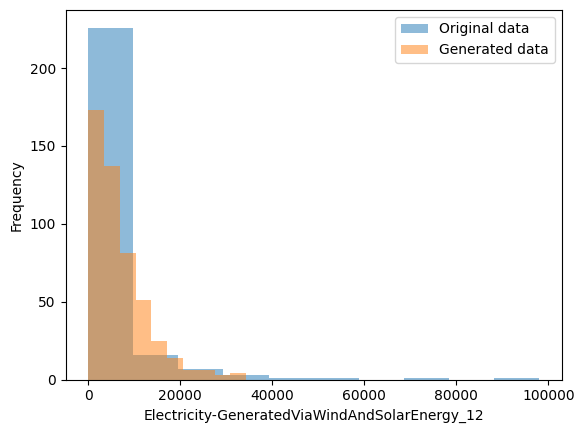

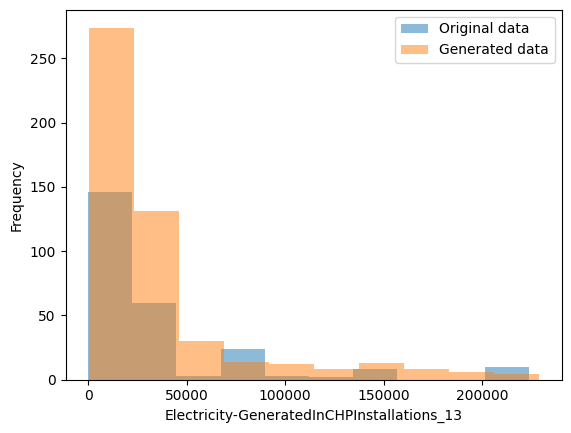

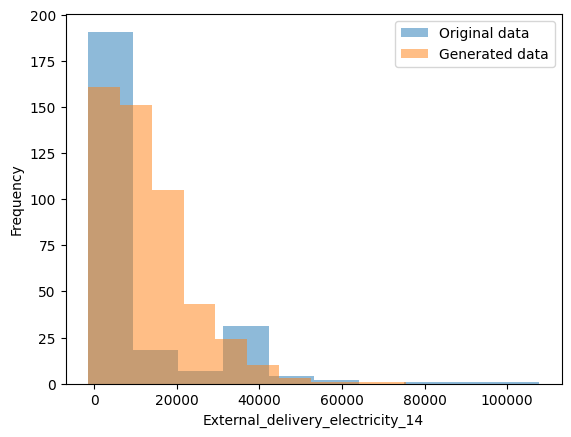

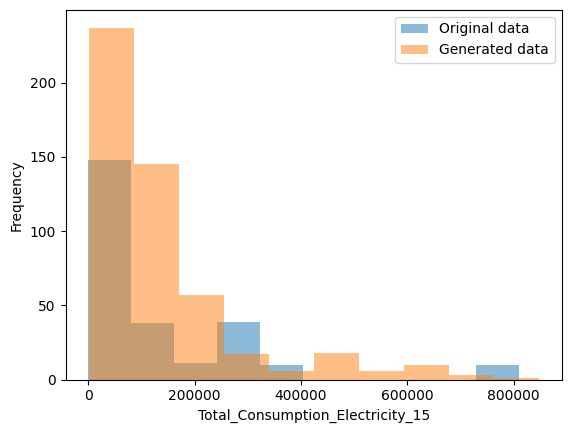

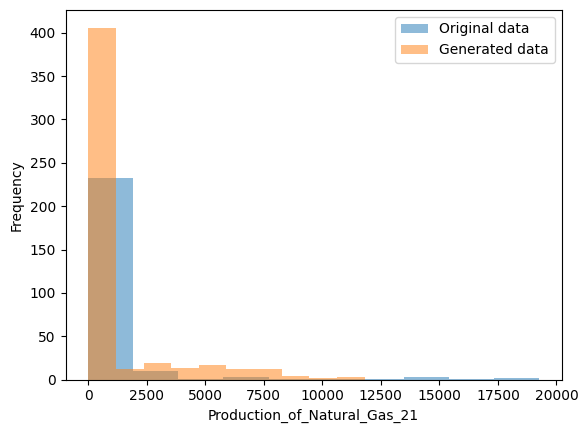

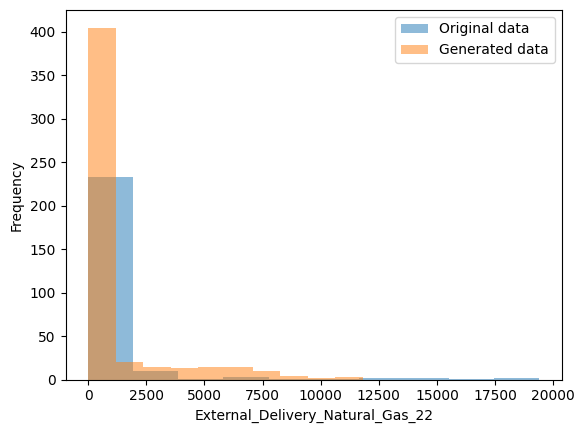

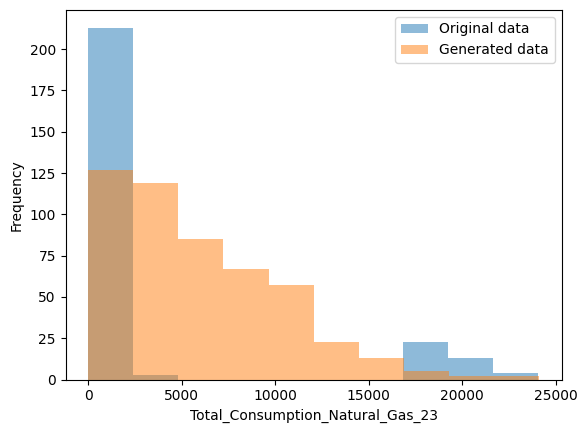

In [ ]:
# Visualize the distributions
for col in df_use.columns:
    plt.figure()
    plt.hist(df_use[col], alpha=0.5, label="Original data")
    plt.hist(new_df_df[col], alpha=0.5, label="Generated data")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - loss: 0.6917 - val_loss: 0.6818
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6784 - val_loss: 0.6620
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6577 - val_loss: 0.6250
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6209 - val_loss: 0.5593
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5522 - val_loss: 0.4632
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4830 - val_loss: 0.3730
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4207 - val_loss: 0.3119
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3569 - val_loss: 0.2699
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2868 - val_loss: 0.2471
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2631 - val_loss: 0.2424
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2493 - val_loss: 0.2413
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2484 - val_loss: 0.2382

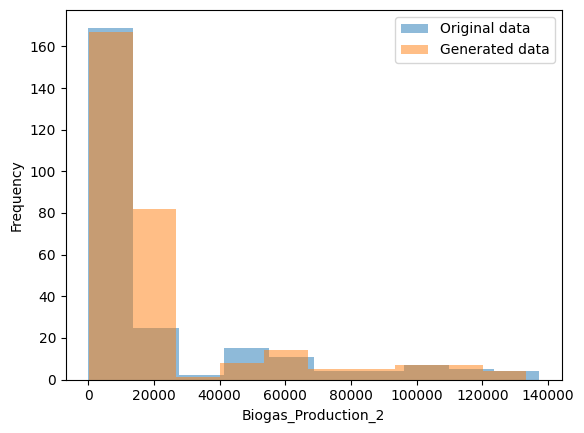

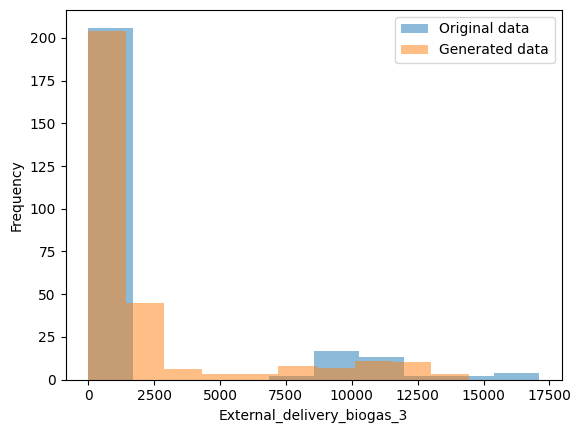

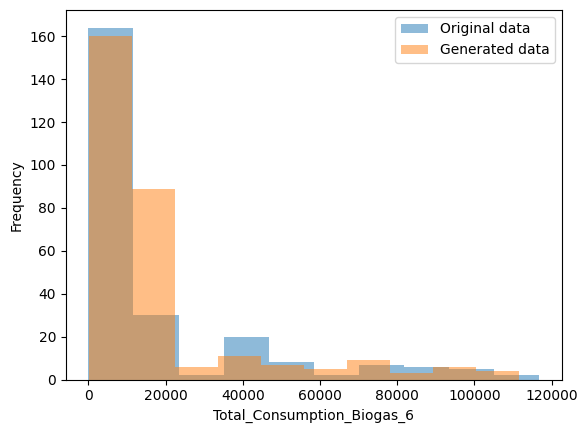

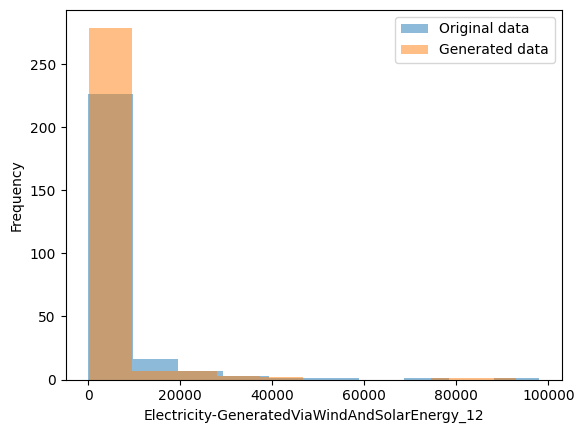

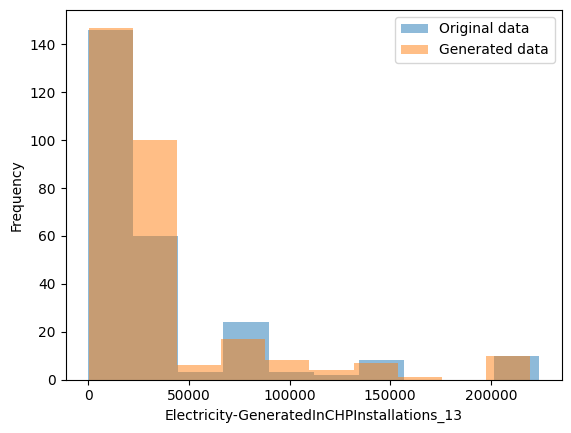

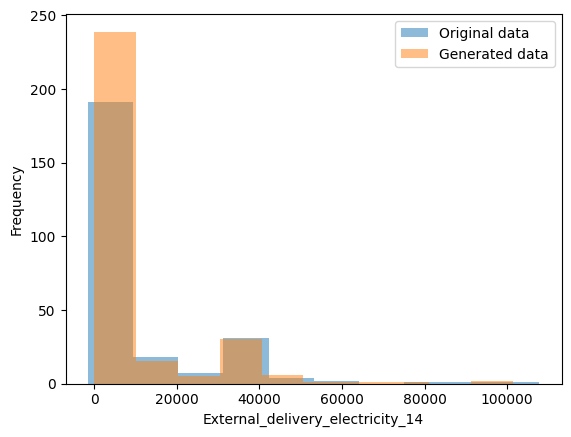

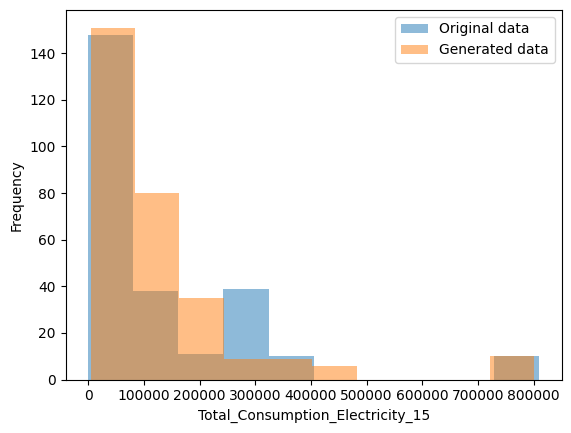

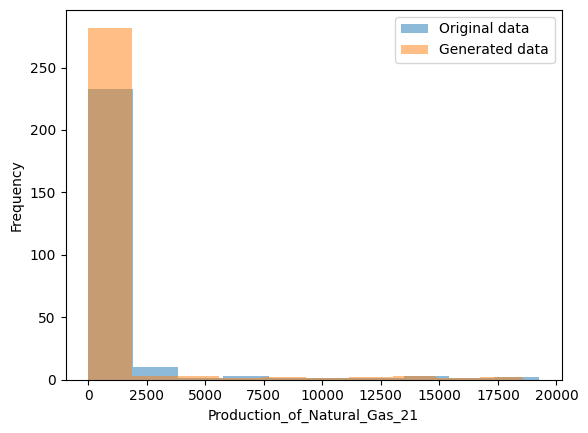

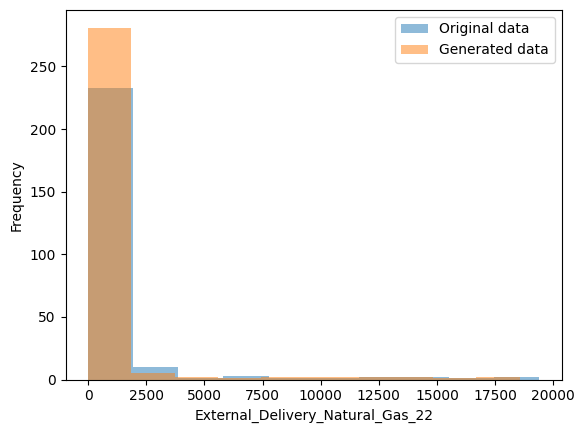

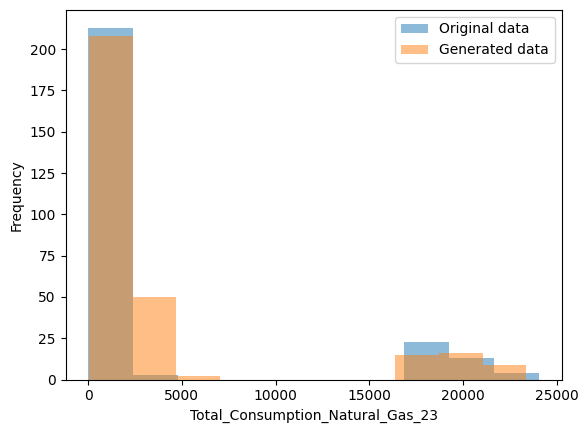

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(n_features,), dtype='float32')

# Define the encoding layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

# Define the decoding layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(n_features, activation='sigmoid')(decoded)

# Define the VAE model
vae = Model(input_layer, decoded)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the VAE model
vae.compile(optimizer=optimizer, loss='binary_crossentropy')

# Train the VAE model
with tf.device('/GPU:0'):
  vae.fit(df_scaled, df_scaled, epochs=100, batch_size=32, validation_split=0.2)

# Generate new data
new_data = vae.predict(df_scaled)

# Inverse transform the generated data to match the original scale
new_data_original_scale = scaler.inverse_transform(new_data)

# Create a DataFrame for the new data
new_df_df = pd.DataFrame(new_data_original_scale, columns=df_use.columns)

# Compare descriptive statistics
df_stats = df_use.describe()
new_df_stats = new_df_df.describe()
print("Means (Original Data):")
print(df_stats.loc['mean'])
print("\nMeans (Generated Data):")
print(new_df_stats.loc['mean'])

print("\nStandard deviations (Original Data):")
print(df_stats.loc['std'])
print("\nStandard deviations (Generated Data):")
print(new_df_stats.loc['std'])

# Visualize the distributions
for col in df_use.columns:
    plt.figure()
    plt.hist(df_use[col], alpha=0.5, label="Original data")
    plt.hist(new_df_df[col], alpha=0.5, label="Generated data")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


In [ ]:
new_df_df

,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,113165.140625,10374.837891,93265.726562,3812.947998,213145.703125,44955.425781,774511.125000,901.667725,854.214722,21524.875000
1,113581.445312,10712.837891,92806.445312,3941.756836,212263.156250,41960.277344,770043.812500,919.534729,859.533386,20487.191406
2,112597.445312,10411.870117,92661.648438,3708.573975,212658.718750,43593.683594,772876.312500,869.171387,815.057800,21249.142578
3,114408.578125,10648.826172,94158.335938,3855.646729,213677.437500,44591.156250,776265.500000,902.478577,850.394897,21359.976562
4,114151.601562,10476.704102,94501.726562,4160.920898,213894.484375,47083.394531,777760.750000,971.653748,921.232117,21818.882812
...,...,...,...,...,...,...,...,...,...,...
295,52762.371094,8065.551758,37260.792969,1123.876587,73114.039062,3338.527588,184106.281250,462.029175,477.970856,702.805786
296,61824.742188,10468.494141,48350.414062,1633.941284,78424.953125,4376.689453,170142.140625,1308.683838,1220.979004,671.801392
297,71020.304688,11971.154297,56580.933594,3556.026123,70144.359375,6813.969727,149282.046875,5150.975586,4730.424805,638.869568
298,61766.613281,9357.678711,52663.929688,13209.391602,53277.957031,15622.945312,137337.265625,12425.527344,11905.335938,1293.319336


In [ ]:
df_imputed

,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,109866.0,11347.0,92560.0,1331.0,209401.0,41296.0,779037.0,1099.0,1114.0,22961.0
1,108012.0,11672.0,89569.0,2417.0,210950.0,40124.0,762091.0,1002.0,1013.0,20568.0
2,106897.0,10259.0,89150.0,2820.0,216906.0,42966.0,780718.0,733.0,746.0,20861.0
3,115222.0,9989.0,94563.0,1651.0,221135.0,47713.0,788580.0,961.0,973.0,20704.0
4,116835.0,8771.0,94669.0,1864.0,220753.0,51210.0,801490.0,1129.0,1141.0,20872.0
...,...,...,...,...,...,...,...,...,...,...
295,51086.0,10428.0,34417.0,751.0,72448.0,3538.0,231913.0,138.0,138.0,348.0
296,58152.0,13590.0,38574.0,4288.0,72874.0,4326.0,236883.0,1445.0,1445.0,619.0
297,61325.0,16316.0,40230.0,5781.0,62002.0,5075.0,235650.0,4537.0,4537.0,1219.0
298,60605.0,9247.0,46547.0,8494.0,55033.0,6033.0,235654.0,11728.0,11733.0,1775.0


In [ ]:
# prompt: concatenate the new_df_df and df_imputed to make a final datasetof 600 entries

import pandas as pd
final_df = pd.concat([df_imputed, new_df_df], axis=0)


In [ ]:
final_df

,Biogas_Production_2,External_delivery_biogas_3,Total_Consumption_Biogas_6,Electricity-GeneratedViaWindAndSolarEnergy_12,Electricity-GeneratedInCHPInstallations_13,External_delivery_electricity_14,Total_Consumption_Electricity_15,Production_of_Natural_Gas_21,External_Delivery_Natural_Gas_22,Total_Consumption_Natural_Gas_23
0,109866.000000,11347.000000,92560.000000,1331.000000,209401.000000,41296.000000,779037.000000,1099.000000,1114.000000,22961.000000
1,108012.000000,11672.000000,89569.000000,2417.000000,210950.000000,40124.000000,762091.000000,1002.000000,1013.000000,20568.000000
2,106897.000000,10259.000000,89150.000000,2820.000000,216906.000000,42966.000000,780718.000000,733.000000,746.000000,20861.000000
3,115222.000000,9989.000000,94563.000000,1651.000000,221135.000000,47713.000000,788580.000000,961.000000,973.000000,20704.000000
4,116835.000000,8771.000000,94669.000000,1864.000000,220753.000000,51210.000000,801490.000000,1129.000000,1141.000000,20872.000000
...,...,...,...,...,...,...,...,...,...,...
295,52762.371094,8065.551758,37260.792969,1123.876587,73114.039062,3338.527588,184106.281250,462.029175,477.970856,702.805786
296,61824.742188,10468.494141,48350.414062,1633.941284,78424.953125,4376.689453,170142.140625,1308.683838,1220.979004,671.801392
297,71020.304688,11971.154297,56580.933594,3556.026123,70144.359375,6813.969727,149282.046875,5150.975586,4730.424805,638.869568
298,61766.613281,9357.678711,52663.929688,13209.391602,53277.957031,15622.945312,137337.265625,12425.527344,11905.335938,1293.319336


In [ ]:
# prompt: export the dataset as csv files

final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/WTTP/final_dataset.csv', index=False)
